In [173]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import glob
from imdb import IMDb
ia = IMDb()
from time import sleep
from collections import Counter
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE



In [174]:
netflix_file_path = 'netflix_titles.csv'
netflix_df = pd.read_csv(netflix_file_path)
netflix_df["Platform"] = "Netflix"

hulu_file_path = 'hulu_titles.csv'
hulu_df = pd.read_csv(hulu_file_path)
hulu_df["Platform"] = "Hulu"

disney_file_path = 'disney_plus_titles.csv'
disney_df = pd.read_csv(disney_file_path)
disney_df["Platform"] = "Disney"

amazon_prime_file_path = 'amazon_prime_titles.csv'
amazon_df = pd.read_csv(amazon_prime_file_path)
amazon_df["Platform"] = "Amazon"

In [175]:
df = pd.concat([netflix_df, hulu_df, amazon_df, disney_df], ignore_index=True)
df.drop_duplicates(inplace=True)
df.drop(columns=["cast"], inplace=True)
df.drop(columns=["country"], inplace=True)
df.drop(columns=["description"], inplace=True)
df["Rating"] = 0
display(df)
combined_df = df

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,Platform,Rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,Netflix,0
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Netflix,0
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix,0
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Netflix,0
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Netflix,0
...,...,...,...,...,...,...,...,...,...,...,...
22993,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Disney,0
22994,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Disney,0
22995,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama",Disney,0
22996,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Disney,0


In [176]:
#code to get output--taks a billion years





# def get_imdb_rating(title, year=None):
#     try:
#         results = ia.search_movie(title)
#         if year:
#             # Try to find a closer match using the year
#             results = [m for m in results if 'year' in m and m['year'] == year]
#         if not results:
#             return None
#         movie = ia.get_movie(results[0].movieID)
#         return movie.get('rating', None)
#     except:
#         return None

# ratings = []
# # Iterate through the DataFrame and fetch IMDb ratings starting from start_row
# for index, row in df[10000:].iterrows():
#     title = row['title']
#     year = row['year'] if 'year' in df.columns else None
#     rating = get_imdb_rating(title, year)
#     ratings.append(rating)
#     print(f"{index+1}/{len(df)}: {title} - {rating}")

# #turn ratings into a csv
# ratings_df = pd.DataFrame({'title': df['title'][10000:], 'imdb_rating': ratings})
# ratings_df.to_csv('imdb_ratings.csv', index=False)


In [177]:
#cleaned output is next
df = pd.read_csv('cleaned_output.csv')
og_df = df

#make an array called parental ratings with combined_df ratings without row 14221
parental_ratings = combined_df['rating'].drop(index=14221).values
#append combined df rating column as parental rating to df

df['Parental Rating'] = parental_ratings


display(df)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform,Parental Rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,7.4,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,PG-13
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,6.7,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,TV-MA
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,7.2,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,TV-MA
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,6.5,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,TV-MA
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,9.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,TV-MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22992,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,6.5,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney,PG-13
22993,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,6.0,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney,PG
22994,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,7.3,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney,PG-13
22995,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,NaN,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Disney,PG-13


In [178]:
df['is_movie'] = df['type'].apply(lambda x: 1 if x.strip().lower() == 'movie' else 0)
#drop none values in imdb_rating
df.dropna(subset=['rating'], inplace=True)
#drop show_id and movie_id columns
df.drop(columns=['show_id'], inplace=True)
#re index dataframe
df.reset_index(drop=True, inplace=True)

# df.drop(['type'], axis=1, inplace=True)
df.drop(['title'], axis=1, inplace=True)

# #numeric for rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#get_dumies on Parental Rating
pd.set_option('display.max_columns', None)
#Parental rating
#if parental rating == ALL then make it G
df['Parental Rating'] = df['Parental Rating'].replace('ALL', 'G')
df['Parental Rating'] = df['Parental Rating'].replace('13+', 'PG-13')
df['Parental Rating'] = df['Parental Rating'].replace('16+', 'PG-13')
df['Parental Rating'] = df['Parental Rating'].replace('18+', 'R')
df['Parental Rating'] = df['Parental Rating'].replace('TV-MA', 'R')
df['Parental Rating'] = df['Parental Rating'].replace('TV-14', 'PG-13')
df['Parental Rating'] = df['Parental Rating'].replace('TV-G', 'G')
df['Parental Rating'] = df['Parental Rating'].replace('TV-PG', 'PG')
df['Parental Rating'] = df['Parental Rating'].replace('TV-NR', 'NR')
df['Parental Rating'] = df['Parental Rating'].replace('7+', 'G')
df['Parental Rating'] = df['Parental Rating'].replace('TV-Y7', 'G')
df['Parental Rating'] = df['Parental Rating'].replace('TV-Y', 'G')
#fill na as unrated
df['Parental Rating'] = df['Parental Rating'].fillna('Unrated')

#remove rows where Paretal Rating is not G, PG, PG-13, R, NR, unrated
df = df[df['Parental Rating'].isin(['G', 'PG', 'PG-13', 'R', 'NR', 'Unrated'])]
#get dummies for Parental Rating with 0s and 1s
df = pd.get_dummies(df, columns=['Parental Rating'], prefix='', prefix_sep='')
display(df)

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform,is_movie,G,NR,PG,PG-13,R,Unrated
0,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,7.4,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,1,False,False,False,True,False,False
1,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,6.7,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,0,False,False,False,False,True,False
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,7.2,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,0,False,False,False,False,True,False
3,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,6.5,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,0,False,False,False,False,True,False
4,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,9.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,Movie,Elizabeth Allen Rosenbaum,"Jake McDorman, Arielle Kebbel, Claudia Karvan,...",United States,"August 13, 2021",2006,5.4,104 min,"Comedy, Coming of Age, Fantasy",Two 13-year-old best friends embark on an adve...,Disney,1,False,False,True,False,False,False
20823,Movie,Carlos Saldanha,"Ray Romano, John Leguizamo, Denis Leary, Simon...","United States, United Kingdom, Australia","June 4, 2021",2009,6.9,97 min,"Animation, Comedy, Family",Our prehistoric pals visit a world inhabited b...,Disney,1,False,False,True,False,False,False
20824,Movie,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,6.5,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney,1,False,False,False,True,False,False
20825,Movie,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,6.0,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney,1,False,False,True,False,False,False


In [179]:
#Top 20 directors and actors
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

top_10_directors = df['director'].value_counts().head(10).index.tolist()
for director in top_10_directors:
    col_name = f"director_{director.replace(' ', '_')}"
    df[col_name] = df['director'].apply(lambda x: 1 if x == director else 0)


# Flatten and count all actors
actor_counts = Counter(
    actor.strip()
    for cast in df['cast'].dropna()
    for actor in cast.split(',')
)

top_actors = [actor for actor, count in actor_counts.most_common(20)]
for actor in top_actors:
    df[f'actor_{actor}'] = df['cast'].apply(lambda x: int(actor in str(x)))

In [180]:
imdb_top_100 = [
    "Steven Spielberg", "Robert Zemeckis", "James Cameron", "Michael Bay",
    "Ron Howard", "George Lucas", "Tim Burton", "Chris Columbus",
    "Christopher Nolan", "Peter Jackson", "Sam Raimi", "Gore Verbinski"," Lee Unkrich",
    "Clint Eastwood",'David Yates', 'Ridley Scott', 'Roland Emmerich', 'Andrew Adamson',
    'Richard Donner', 'Tony Scott', 'Jay Roach', 'Ivan Reitman', 'Barry Sonnenfeld',
    'Brett Ratner', ' Dennis Dugan', 'Steven Soderbergh', 'John Lasseter', 'M. Night Shyamalan',
    'Todd Phillips', 'Garry Marshall', 'Shawn Levy', 'Joel Schumacher', 'Jon Favreau', 'Martin Scorsese',
    'Tom Shadyac', 'Conrad Vernon', 'Jon Turteltaub', 'Carlos Saldanha', 'Joe Johnston',
    'Barry Levinson', 'Wolfgang Petersen', 'Sydney Pollack', 'Peter Segal', 'Rob Minkoff',
    'Zack Snyder', 'Bryan Singer', 'Chris Renaud', 'Oliver Stone', 'J.J. Abrams',
    'Tom McGrath', 'Raja Gosnell', 'Mike Nichols', 'Bill Condon', 'Stephen Sommers',
    'Terry Farrell', 'Bobby Farrelly', 'Peter Farrelly', 'Brad Bird', 'Adam Shankman',
    'David Fincher', 'Justin Lin', 'Robert Rodriguez', 'Eric Darnell', 'Martin Campbell',
    'Andrew Stanton', 'Tyler Perry', 'Lilly Wachowski', 'Lana Wachowski', 'Rob Reiner',
    'Joss Whedon', 'Brian De Palma', 'Sam Mendes', 'Sylvester Stallone', 'Kelly Asbury',
    'John McTiernan', 'Rob Cohen', 'Andy Tennant', 'Quentin Tarantino', 'Pete Docter',
    'Mike Newell', 'Wes Craven', 'Michael Apted', 'Frank Oz', 'Andrew Davis',
    'David Zucker', 'Gary Ross', 'Jan de Bont', 'Betty Thomas', 'Nancy Meyers',
    'Chris Sanders', 'Ang Lee', 'Pierre Coffin', 'Woody Allen', 'Frank Coraci',
    'John Woo', 'Joel Coen', 'David Silverman', 'Phillip Noyce', 'Mel Gibson', 'Michael Mann'
]
top_50 = set(imdb_top_100[:50])
top_100 = set(imdb_top_100)

df['is_top_50_director'] = df['director'].apply(lambda x: 1 if x in top_50 else 0)
df['is_top_100_director'] = df['director'].apply(lambda x: 1 if x in top_100 else 0)


count = (df['is_top_100_director'] == 1).sum()

count = (df['is_top_50_director'] == 1).sum()
df.drop(['director'], axis=1, inplace=True)
df.drop(['cast'], axis=1, inplace=True)


#US vs global
df['country'] = df['country'].fillna('').str.strip()
df['is_us_production'] = df['country'].apply(lambda x: 1 if 'United States' in x else 0)
df.drop('country', axis=1, inplace=True)

df.drop('date_added', axis=1, inplace=True)
df['Platform'] = df['Platform'].fillna('').str.strip()
df = pd.get_dummies(df, columns=['Platform'], drop_first=True)


#df = pd.get_dummies(df, columns=['Parental Rating'], drop_first=True)

#tv vs movie
df['is_movie'] = df['type'].apply(lambda x: 1 if x.strip().lower() == 'movie' else 0)
df.drop('type', axis=1, inplace=True)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20492 entries, 0 to 20826
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   release_year                     20492 non-null  int64  
 1   rating                           20491 non-null  float64
 2   duration                         20336 non-null  object 
 3   listed_in                        20492 non-null  object 
 4   description                      20489 non-null  object 
 5   is_movie                         20492 non-null  int64  
 6   G                                20492 non-null  bool   
 7   NR                               20492 non-null  bool   
 8   PG                               20492 non-null  bool   
 9   PG-13                            20492 non-null  bool   
 10  R                                20492 non-null  bool   
 11  Unrated                          20492 non-null  bool   
 12  director_Unknown       

In [182]:
df['duration'] = df['duration'].fillna('').astype(str).str.strip()

# Extract numbers from duration for all rows
duration_nums = df['duration'].str.extract(r'(\d+)')[0].astype(float)

# Create two new columns
df['duration_minutes'] = np.where(df['is_movie'] == 1, duration_nums, np.nan)
df['duration_seasons'] = np.where(df['is_movie'] == 0, duration_nums, np.nan)
df.drop('duration', axis=1, inplace=True)




In [183]:
df['listed_in'] = df['listed_in'].fillna('').astype(str)
from collections import Counter
genre_counts = Counter(
    genre.strip()
    for listed in df['listed_in']
    for genre in listed.split(',')
)

#top 15 genres
top_genres = [genre for genre, count in genre_counts.most_common(15)]
for genre in top_genres:
    df[f'genre_{genre.replace(" ", "_")}'] = df['listed_in'].apply(lambda x: int(genre in x))
df.drop('listed_in', axis=1, inplace=True)

In [184]:
#description sentiment
df['description'] = df['description'].fillna('')
df['description_sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

#description length
df['description_length'] = df['description'].apply(len)

df.drop('description', axis=1, inplace=True)

In [185]:
#df is now all numerical
#random forest using numerical data only
df['duration_minutes'] = df['duration_minutes'].fillna(0)
df['duration_seasons'] = df['duration_seasons'].fillna(0)
df= df.dropna(subset=['rating'])

y = df['rating']
X = df.drop(columns=['rating'])

display(df)

#DF IS DONE HERE
numerical_df = df

,release_year,rating,is_movie,G,NR,PG,PG-13,R,Unrated,director_Unknown,director_Jay_Chapman,director_Manny_Rodriguez,director_Mark_Knight,director_Jay_Karas,director_John_English,"director_Raúl_Campos,_Jan_Suter",director_Rajiv_Chilaka,director_Jack_Hannah,director_Marcus_Raboy,actor_Unknown,actor_Anupam Kher,actor_Amitabh Bachchan,actor_Shah Rukh Khan,actor_Jim Cummings,actor_Nassar,actor_Akshay Kumar,actor_Naseeruddin Shah,actor_Danny Trejo,actor_Paresh Rawal,actor_Nicolas Cage,actor_Samuel L. Jackson,actor_Om Puri,actor_Prakash Raj,actor_Gene Autry,actor_Fred Tatasciore,actor_Boman Irani,actor_Julie Tejwani,actor_Bruce Willis,actor_Tony Hale,is_top_50_director,is_top_100_director,is_us_production,Platform_Disney,Platform_Hulu,Platform_Netflix,duration_minutes,duration_seasons,genre_Drama,genre_Comedy,genre_International_Movies,genre_Dramas,genre_Action,genre_Comedies,genre_Suspense,genre_International_TV_Shows,genre_Documentaries,genre_Horror,genre_Documentary,genre_Kids,genre_Animation,genre_Action_&_Adventure,genre_Romance,description_sentiment,description_length
0,2020,7.4,1,False,False,False,True,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,90.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.333333,152
1,2021,6.7,0,False,False,False,False,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,0.0,2.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.000000,147
2,2021,7.2,0,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,0.0,1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,-0.050000,146
3,2021,6.5,0,False,False,False,False,True,False,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.030505,147
4,2021,9.0,0,False,False,False,False,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,0.0,2.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.000000,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,2006,5.4,1,False,False,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,104.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,100
20823,2009,6.9,1,False,False,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,True,False,False,97.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,91
20824,2009,6.5,1,False,False,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,108.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,94
20825,2009,6.0,1,False,False,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,True,False,False,106.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.100000,93


In [186]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluate
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Accuracy: 0.1670
MSE: 1.3733
MAE: 0.8988


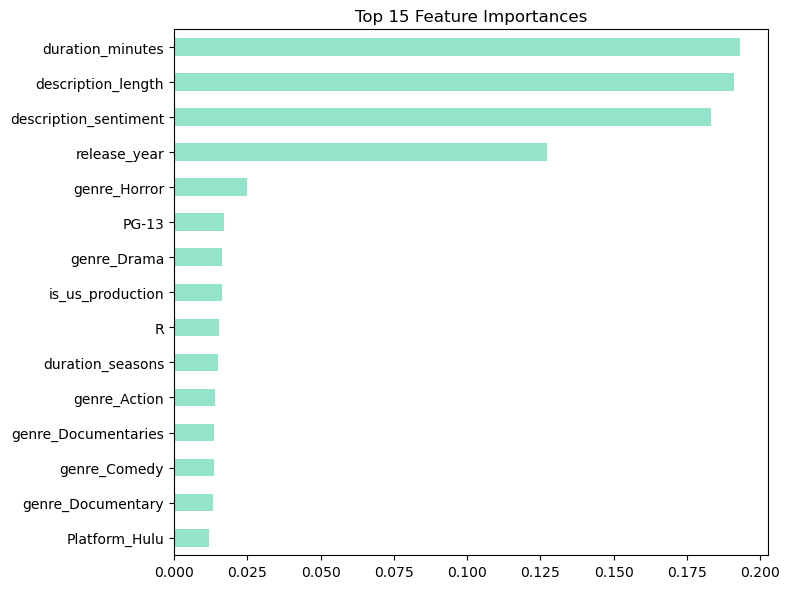

In [187]:
#feature importance



importances = model.feature_importances_
feature_names = X_train.columns
feat_importance = pd.Series(importances, index=feature_names)

feat_importance.nlargest(15).plot(kind='barh', figsize=(8, 6),color='#94e3cb')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

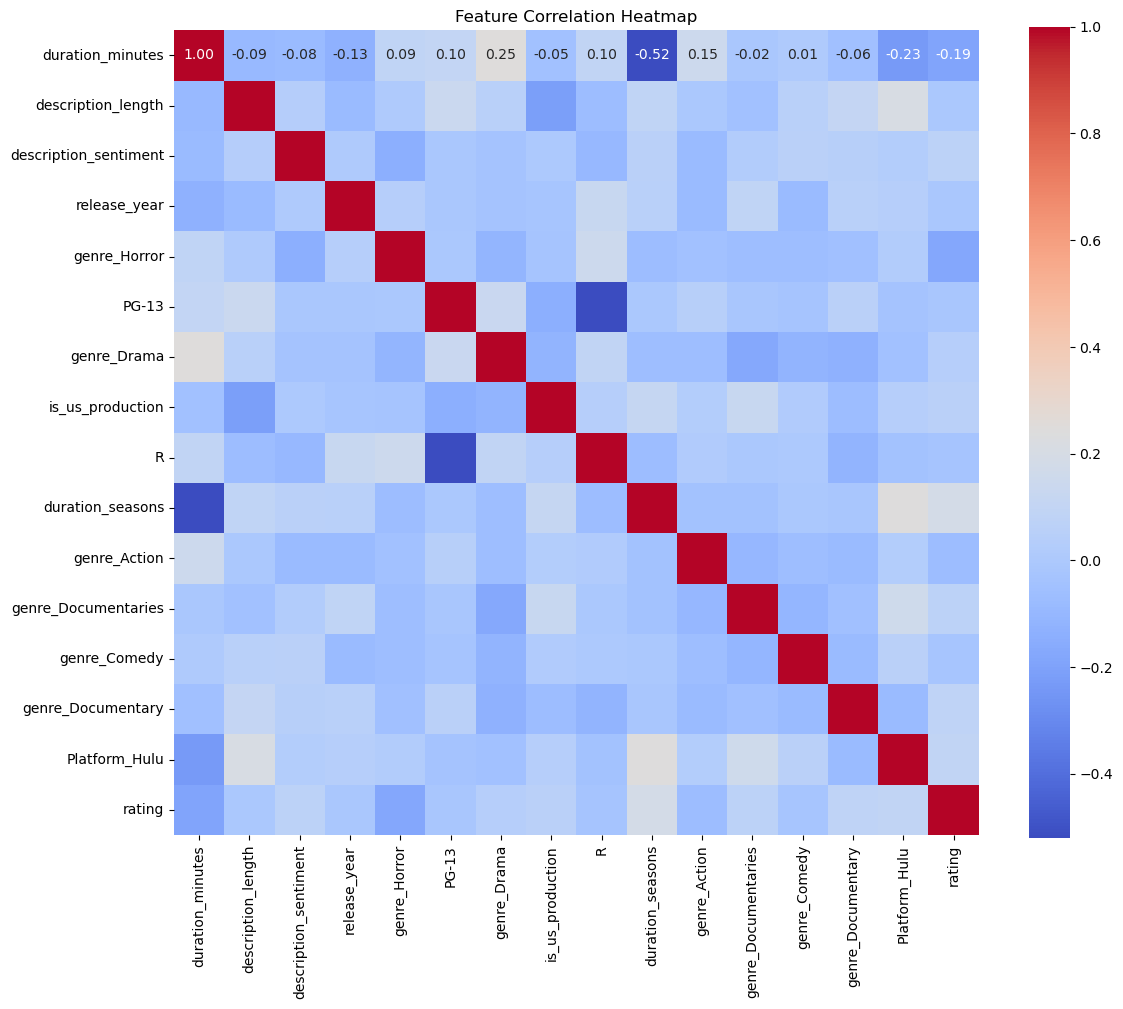

In [188]:
# Compute correlation matrix
corr_matrix = df[list(feat_importance.nlargest(15).index) + ['rating']].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
X.info()
#use forward elimination to find best features
selector = RFE(model, n_features_to_select=20)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print("Selected Features using RFE:")
print(selected_features)




<class 'pandas.core.frame.DataFrame'>
Index: 20491 entries, 0 to 20826
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   release_year                     20491 non-null  int64  
 1   is_movie                         20491 non-null  int64  
 2   G                                20491 non-null  bool   
 3   NR                               20491 non-null  bool   
 4   PG                               20491 non-null  bool   
 5   PG-13                            20491 non-null  bool   
 6   R                                20491 non-null  bool   
 7   Unrated                          20491 non-null  bool   
 8   director_Unknown                 20491 non-null  int64  
 9   director_Jay_Chapman             20491 non-null  int64  
 10  director_Manny_Rodriguez         20491 non-null  int64  
 11  director_Mark_Knight             20491 non-null  int64  
 12  director_Jay_Karas     

In [147]:
# Keep the same param grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'ccp_alpha': [0.0, 0.1, 0.25],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters from Randomized Search:")
print(best_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ccp_alpha=0.0, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END ccp_alpha=0.0, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END ccp_alpha=0.0, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END ccp_alpha=0.25, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END ccp_alpha=0.25, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=5, max_features=None, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END ccp_alpha=0.25, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=5, max_features=None, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END ccp_alpha=0.

In [148]:
#best model RandomForestRegressor(max_depth=10, max_features=None, min_samples_split=10,random_state=42)
model = RandomForestRegressor(n_estimators = 50, max_depth=10, max_features=None, min_samples_split=10,
                      random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluate
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Accuracy: 0.1954
MSE: 1.3264
MAE: 0.8882


In [149]:
xgb = XGBRegressor(random_state=42, verbosity=0)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',  # or 'accuracy' if classification
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsampl

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.8, 1.0]},
                   scoring='neg_mean_squared_error', verbose=2)

In [150]:
# train/test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='mae',
    random_state=42
)

#evaluate
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

#predict and evaluate
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Validation MAE: {mae:.4f}")

[0]	validation_0-mae:0.99808
[1]	validation_0-mae:0.98528
[2]	validation_0-mae:0.97433
[3]	validation_0-mae:0.96573
[4]	validation_0-mae:0.95678
[5]	validation_0-mae:0.94979
[6]	validation_0-mae:0.94354
[7]	validation_0-mae:0.93855
[8]	validation_0-mae:0.93311
[9]	validation_0-mae:0.92882
[10]	validation_0-mae:0.92542
[11]	validation_0-mae:0.92152
[12]	validation_0-mae:0.91849
[13]	validation_0-mae:0.91557
[14]	validation_0-mae:0.91338
[15]	validation_0-mae:0.91125
[16]	validation_0-mae:0.90985
[17]	validation_0-mae:0.90882
[18]	validation_0-mae:0.90728
[19]	validation_0-mae:0.90640
[20]	validation_0-mae:0.90500
[21]	validation_0-mae:0.90404
[22]	validation_0-mae:0.90303
[23]	validation_0-mae:0.90157
[24]	validation_0-mae:0.90099
[25]	validation_0-mae:0.90072
[26]	validation_0-mae:0.89943
[27]	validation_0-mae:0.89816
[28]	validation_0-mae:0.89730
[29]	validation_0-mae:0.89662
[30]	validation_0-mae:0.89654
[31]	validation_0-mae:0.89551
[32]	validation_0-mae:0.89516
[33]	validation_0-ma

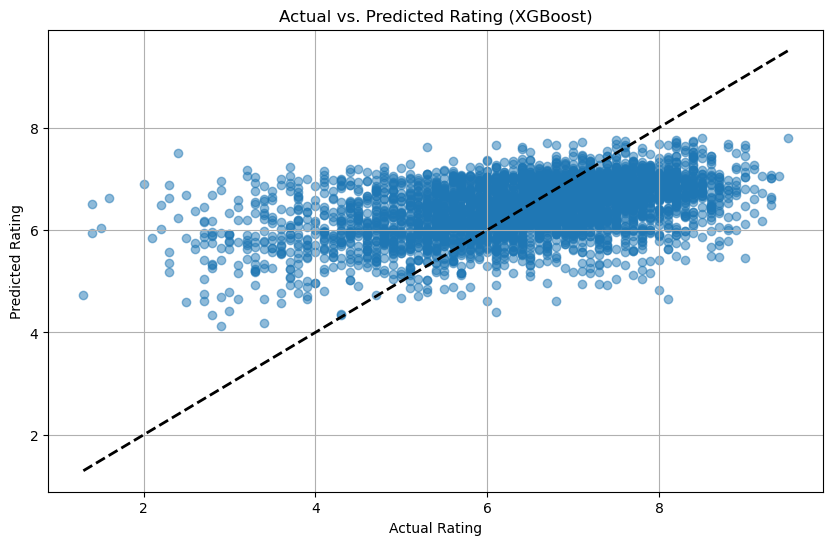

In [151]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs. Predicted Rating (XGBoost)")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2) # Plotting the diagonal line
plt.grid(True)
plt.show()

In [152]:
# Select top features from training set
top_features = feat_importance.nlargest(50).index

# Keep only those columns
X_train = X_train[top_features]
X_test = X_test[top_features]

# Fit and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Accuracy: 0.1370
MSE: 1.4226
MAE: 0.9287


In [155]:
# Initialize and fit KNN


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
accuracy = knn.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Accuracy: -0.0280
MSE: 1.6946
MAE: 1.0087
